In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from collections import Counter

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Introduction

The goal of this sprint is to perform simple exploratory data analysis of the MNIST dataset,
which is a set of matricies that are the the grayscale pixel values of handwritten digits and then
the label which is the number the digit actually is.

You are going to implement various functions responsible for returning information about the dataset.
Each function will have the inputs specified and what each input is supposed to be as well as the specificed 
intended output.
You will then have to plot results from the function in various ways to visualize your findings.


### Each function you have to implement is worth 20 points.
### There will be a total of 100 points.
### The 6th function to implement is extra credit worth 20 points

In [6]:
def least_common_digit(x_set, y_set):
    '''
       Input: x_set, the x values of the dataset and y_set, the y values of the  dataset
       Expected Output: The image from the x set of the least common digit.
    '''
    d = {}
    instances = -57 #Number of instances the image appeared in the set
    least_common_v = 0 #Value of the image
    
    for i,num in enumerate(y_set): 
        if num not in d: 
            d[num] = 1 #first time seeing the value
        else:
            d[num] += 1 #if it already exists, incrementing the number of instances
        
    for i in range(len(d)):
        if instances == -57:#if it is the first time
            instances = d[i] #store the number of times this value appeared in the set
            least_common_v = i #store the value
        if d[i] < instances: 
            instances = d[i]
            least_common_v = i 
            
    for i,num in enumerate(y_set):
        if num == least_common_v:
            return x_set[i]

lc_train = least_common_digit(x_train, y_train)
lc_test = least_common_digit(x_test, y_test)

In [9]:
def most_common_digit(x_set, y_set):
    '''
       Input: x_set, the x values of the dataset and y_set, the y values of the  dataset
       Expected Output: The image from the x set of the most common digit.
    '''
    d = {}
    most = -1 #number of times the value appeared in the set
    most_v = 0 #value
    
    for i,num in enumerate(y_set):
        if num not in d:
            d[num] = 1#first appearance -> adding to the dictionary
        else:
            d[num] += 1#been there, done that -> adding another instance
        
    for i in range(len(d)): #going through the dictionary to determine the value with most instances
        if d[i] > most:
            most = d[i]
            most_v = i
            
    for i,num in enumerate(y_set): 
        if num == most_v:
            return x_set[i]

    
mc_train = most_common_digit(x_train, y_train)
mc_test = most_common_digit(x_test, y_test)

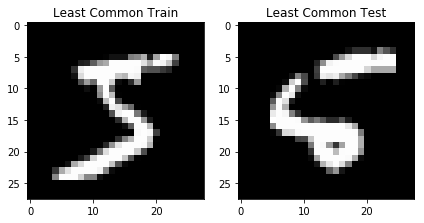

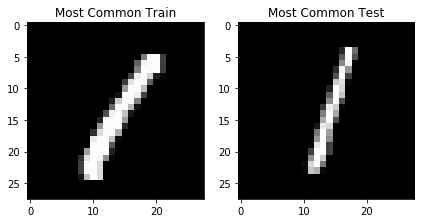

In [8]:
def plot_two(im1, title1, im2, title2):
    '''
        Input: im1, a matrix representing a grayscale image and title1 a string,im2 a matrix representing 
        a grayscale image and title2 a string
        Expected Output: A tuple (fig, ax) representing a generated figure from matplotlib and two subplots 
        ready to display the inputed images with the given titles
    '''
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(im1, cmap = 'gray')
    ax[0].set_title(title1)
    ax[1].imshow(im2, cmap = 'gray')
    ax[1].set_title(title2)
    fig.tight_layout()
    return (fig, ax)

plot_two(lc_train, 'Least Common Train', lc_test, 'Least Common Test')
plot_two(mc_train, 'Most Common Train', mc_test, 'Most Common Test')
plt.show()

In [10]:
def how_many_of_each_digit(y_set):
    '''
       Input: y_set, the y values of the training set
       Expected Output: A dict of the count of each digit in the set
    '''
    d = {}
    
    for i, num in enumerate(y_set):
        if num not in d:
            d[num] = 1
        else:
            d[num] += 1
    return d

count_train = how_many_of_each_digit(y_train)
count_test = how_many_of_each_digit(y_test)

In [14]:
def bar_chart(train, test):
    '''
    Inputs: train, a dictionary of count of each digit of the training set and test, a dictionary of the count
    of each digit for the test set
    Expected Output: A tuple (fig, ax) ready to show using matplotlib
    '''
    fig, ax = plt.subplots(1,1)
    ax.bar(range(len(train)), train.values(), color = 'blue')
    ax.bar(range(len(test)), test.values(), color = 'red')
    return (fig, ax)

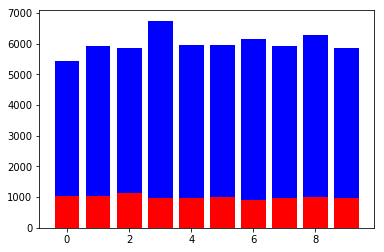

In [15]:
fig, chart = bar_chart(count_train, count_test)
plt.show()

## Finally for extra credit after doing the small data explorations above, using the data provided here or if you are feeling particularly fancy download a dataset from somewhere and make an interesting visualization of something you think would be important to know if you were exploring this dataset in a real world setting.

### This is extra credit and worth 20points.

In [66]:
import matplotlib.pyplot as plt

def interesting_visualization():
    cnt = how_many_of_each_digit(y_test) #Dictionary with data for each number   
    labels = '0','1', '2', '3', '4', '5', '6', '7', '8', '9' #labels for every number
    amount = [] #instances for each label
    for i in range(10):
        amount.append(count_train[i])
    #to make this visualization pretty assigned a colour to each value/instance/label
    colors = ['mediumturquoise','mediumseagreen', 'c', 'aqua', 'lightskyblue', 'lavender', 'thistle', 'plum', 'mediumslateblue',  'lightslategrey']

    #plotting the visualization
    plt.pie(amount, labels=labels, colors=colors,
            autopct='%1.1f%%')
    plt.title("Training Data")
    plt.axis('equal')#to make it into a circle
    plt.show()

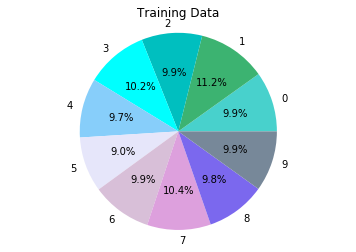

In [67]:
interesting_visualization()